In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Чтение исходного файла

In [2]:
with open("D:/Google Диск/Deep Learning courses/lesson4/house prices dataset.txt") as f:
    data = f.readlines()

In [165]:
def proc(string):
    '''
    parse string with data from file
    '''
    return string.split(',')[1].strip().replace(';', '')

## Создание DataFrame объекта

In [166]:
columns = [proc(data[i]) for i in range(42,54)]
columns[0] += ' in hundreds of dollars'

df = pd.DataFrame([data[i].split()[1:] for i in range(54,82)], columns=columns)
# output dataframe first 10 entrances
df.head(10)

,the local selling prices in hundreds of dollars,the number of bathrooms,the area of the site in thousands of square feet,the size of the living space in thousands of square feet,the number of garages,the number of rooms,the number of bedrooms,the age in years,construction type,architecture type,number of fire places.,selling price
0,4.9176,1.0,3.4720,0.998,1.0,7,4,42,3,1,0,25.9
1,5.0208,1.0,3.5310,1.500,2.0,7,4,62,1,1,0,29.5
2,4.5429,1.0,2.2750,1.175,1.0,6,3,40,2,1,0,27.9
3,4.5573,1.0,4.0500,1.232,1.0,6,3,54,4,1,0,25.9
4,5.0597,1.0,4.4550,1.121,1.0,6,3,42,3,1,0,29.9
5,3.8910,1.0,4.4550,0.988,1.0,6,3,56,2,1,0,29.9
6,5.8980,1.0,5.8500,1.240,1.0,7,3,51,2,1,1,30.9
7,5.6039,1.0,9.5200,1.501,0.0,6,3,32,1,1,0,28.9
8,16.4202,2.5,9.8000,3.420,2.0,10,5,42,2,1,1,84.9
9,14.4598,2.5,12.8000,3.000,2.0,9,5,14,4,1,1,82.9


**в качестве признака возьмем размер жилой площади в футах квадратных (столбец 4)**

Последний столбец - это целевая переменная, y

In [168]:
# get the size of the living space in thousands of square feet
X = df[df.columns[3]].values.astype(np.float32)  # жилая площадь
y = df[df.columns[11]].values.astype(np.float32) # цена на жилье

# reshape to matrix
X = X.reshape(len(X), 1)

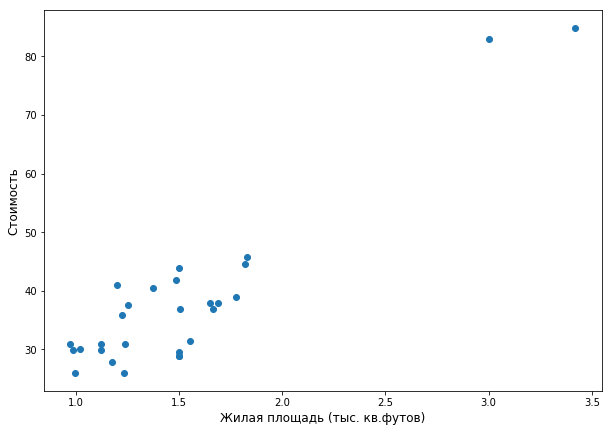

In [182]:
plt.figure(figsize=(10, 7))

plt.scatter(X, y)
plt.xlabel('Жилая площадь (тыс. кв.футов)', fontsize=12)
plt.ylabel('Стоимость', fontsize=12)
plt.show()

вспомогательные функции

In [183]:
def pred(x, w):
    '''
    make predictions
    '''
    return w.dot(x.T)

def mse(y_pred, y):
    '''
    calculate mean squared error
    '''
    return (y_pred-y).T.dot(y_pred-y)/len(y_pred)

### Построим зависимость величины ошибки от параметра w1

Гипотеза: $h_w(x)=w1*x$

В качестве разных $w1$ возьмем 100 значений на интервале от 0 до 50  

In [184]:
w1 = np.linspace(0,50, num=100, dtype=np.float32)
w1 = w1.reshape((len(w1), 1))

print(w1.shape)
print(X.shape)
print(X_mat.shape)

(100, 1)
(28, 1)
(28, 2)


In [185]:
y_pred = pred(X, w1)
mse_x  = [mse(x,y) for x in y_pred]

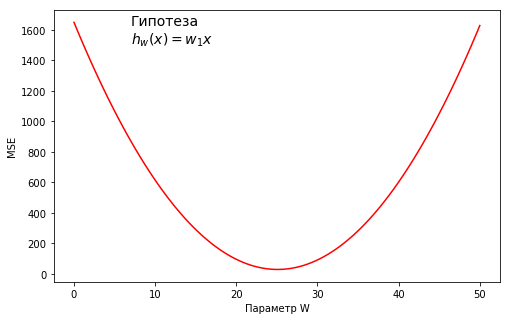

In [190]:
plt.figure(figsize=(8, 5))
plt.plot(w1,mse_x, c="r")
plt.ylabel('MSE')
plt.xlabel('Параметр W')
plt.text(7, 1500, 'Гипотеза\n$h_{w}(x)=w_1x$', fontsize=14)
plt.show()

## Построим график зависимости ошибки от двух переменных 

Гипотеза: $h_w(x)=w0+w1*x$

В качестве разных $w0$ возьмем 100 значений на интервале от 10 до 50  

Построим сетку из значений

In [191]:
w0 = np.linspace(10,50, num=100, dtype=np.float32)
w0 = w0.reshape((len(w0), 1))


W0, W1 = np.meshgrid(w0, w1)
print('W0 shape: {}'.format(W0.shape))
print('W1 shape: {}'.format(W1.shape))

W0 shape: (100, 100)
W1 shape: (100, 100)


Для того, чтобы перемножить матрицу параметров на матрицу признаков, нужно добавить единичный столбец, так как формула:
$$h_w(x)=w0+w1*x=w0*1+w1*x$$

In [192]:
X_mat = np.ones((X.shape[0],2))
X_mat[:,1] = X[:,0]

print(X_mat[:5])

[[ 1.          0.99800003]
 [ 1.          1.5       ]
 [ 1.          1.17499995]
 [ 1.          1.23199999]
 [ 1.          1.12100005]]


In [151]:
W = np.stack([np.ravel(W0), np.ravel(W1)], axis=1)
print('Weight matrix shape: {}'.format(W.shape))

y_pred_mul = pred(X_mat, W)
print('Predictions shape: {}'.format(y_pred_mul.shape))

cost_vals  = np.array([mse(x,y) for x in y_pred_mul])
cost_vals  = cost_vals.reshape(W0.shape)
print('Cost function values shape: {}'.format(cost_vals.shape))

Weight matrix shape: (10000, 2)
Predictions shape: (10000, 28)
Cost function values shape: (100, 100)


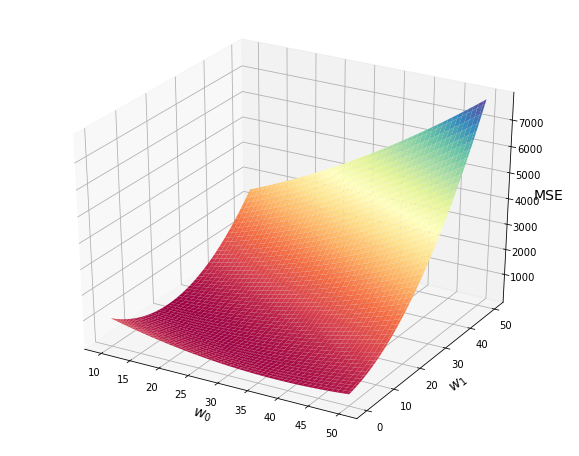

In [156]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(W0, W1, cost_vals, cmap=plt.cm.Spectral)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_zlabel('MSE', fontsize=14)
plt.show()